# Amazon Stock Prediction

In [163]:
# panda technical analysis
!pip install pandas_ta -q

In [164]:
!pip install mplfinance -q

In [165]:
!pip install yfinance

### Importing Necessary Libraries


In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf #matplotlib finance

import seaborn as sns
import yfinance as yf
import pandas_ta as ta # for technical analysis

from keras.models import Sequential
from keras.layers import *

import warnings
warnings.filterwarnings("ignore") 

### Downloading StockPrice Using yfinance

In [167]:
df = yf.download(tickers = 'AMZN', start = '2019-02-20',end = '2024-02-20')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-20,81.500000,81.746498,80.505997,81.105003,81.105003,66752000
2019-02-21,80.992500,81.178001,80.045502,80.972000,80.972000,69668000
2019-02-22,81.175003,81.747002,81.058502,81.578003,81.578003,61924000
2019-02-25,82.072502,82.730003,81.519501,81.650002,81.650002,63690000
2019-02-26,81.299004,81.999496,80.806503,81.820000,81.820000,53316000
...,...,...,...,...,...,...
2024-02-12,174.800003,175.389999,171.539993,172.339996,172.339996,51050400
2024-02-13,167.729996,170.949997,165.750000,168.639999,168.639999,56345100
2024-02-14,169.210007,171.210007,168.279999,170.979996,170.979996,42815500


### Visualising Stocks


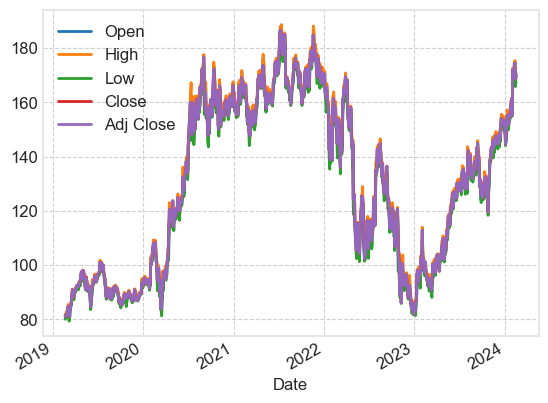

In [168]:
df.iloc[:,:-1].plot()
plt.show()


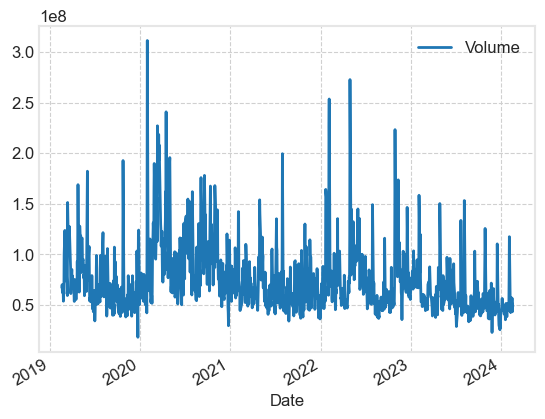

In [169]:
df.iloc[:,-1].plot()
plt.legend()
plt.show()

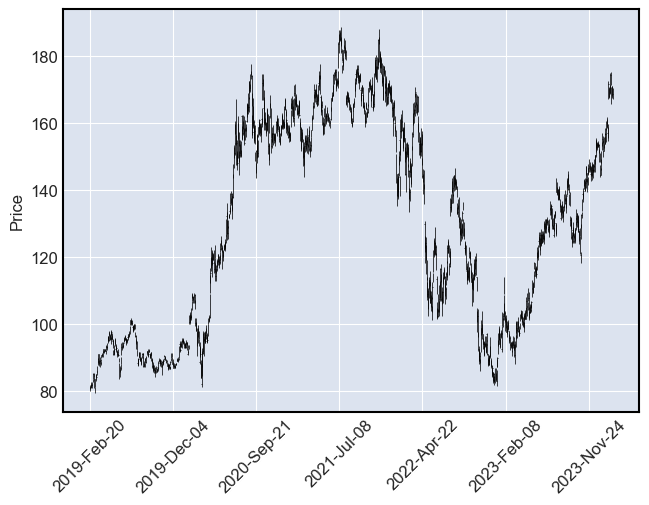

In [170]:
mpf.plot(df)

In [171]:
# This data is so big so we draw more chart like =candle etc.

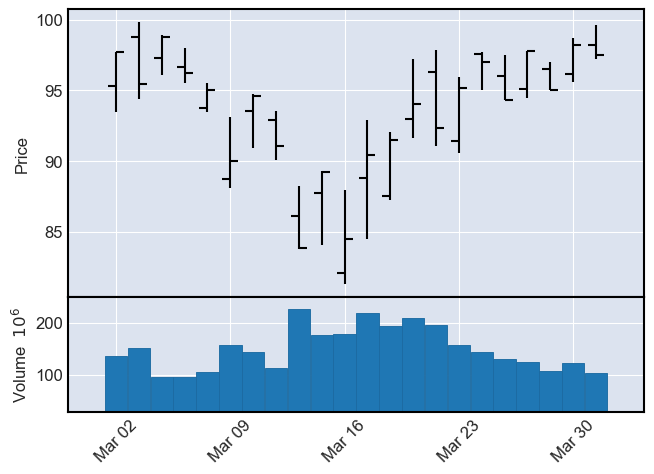

In [172]:
# OHLC Chart (Open,High,Low,Close data )

mpf.plot(df['2020-03'], volume = True)

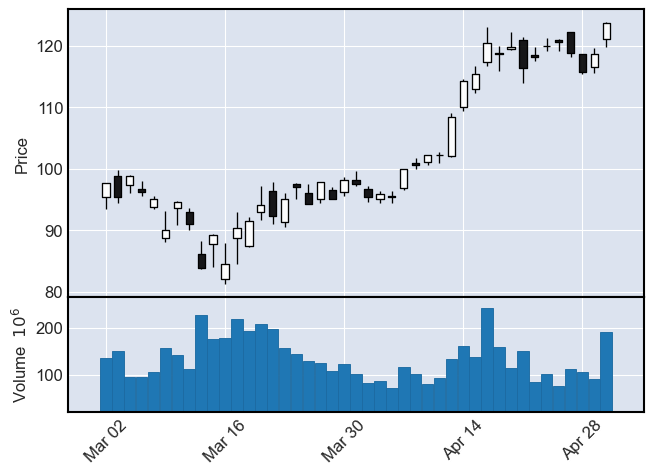

In [173]:
# Candle Stick Chart for March 2020

mpf.plot(df['2020-03':'2020-04'],type ='candle', volume = True)

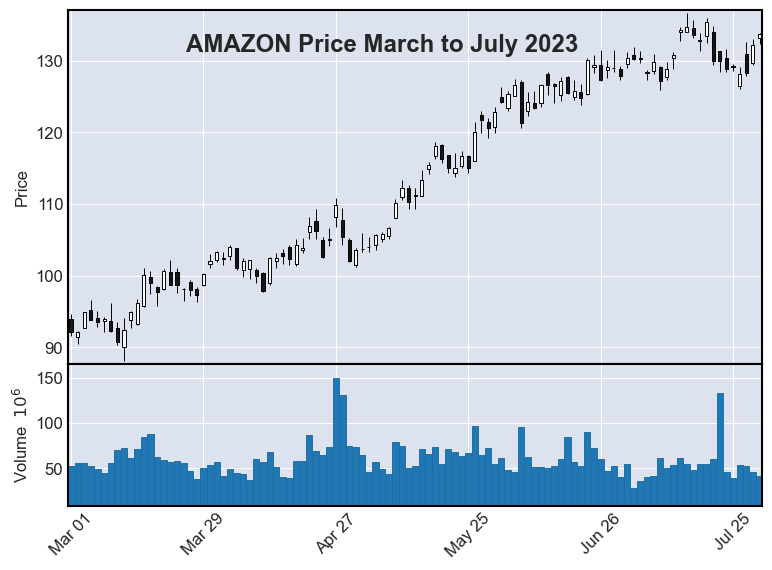

In [174]:
 mpf.plot(df['2023-03':'2023-07'], type='candle',
 title= 'AMAZON Price March to July 2023',
 volume = True, tight_layout = True)

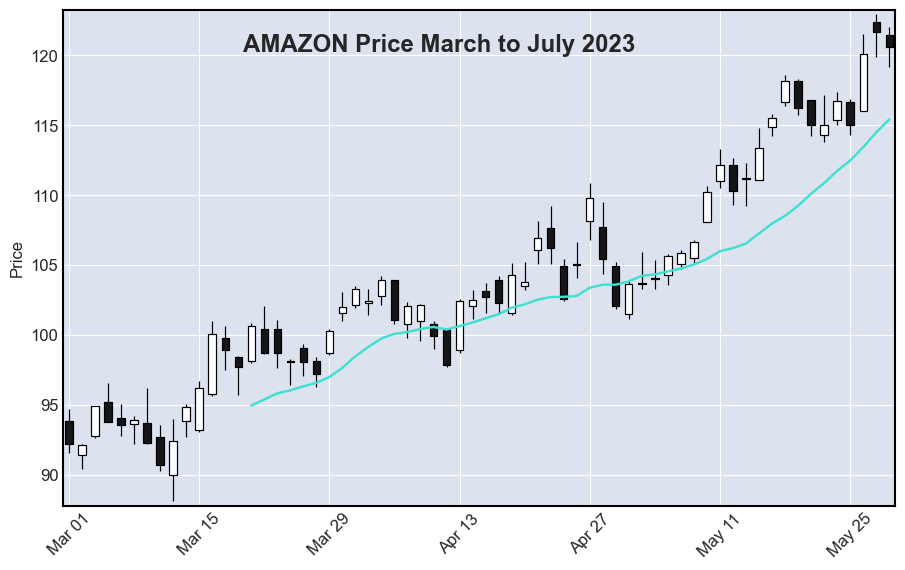

In [175]:
 mpf.plot(df['2023-03':'2023-05'], figratio=(20,12),
 type='candle', title= 'AMAZON Price March to July 2023',
 mav=15, tight_layout = True)

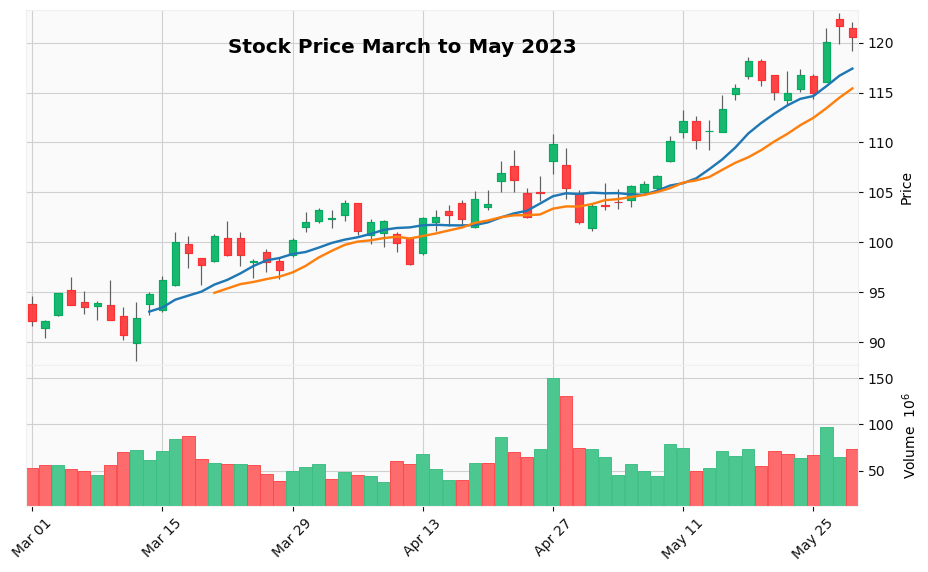

In [176]:
mpf.plot(df['2023-03':'2023-05'],
 figratio=(10,6), type='candle',
 title= 'Stock Price March to May 2023',
 mav=(10,15),
 #ema=(10),
 volume = True,
 tight_layout = True, style ='yahoo',
 )

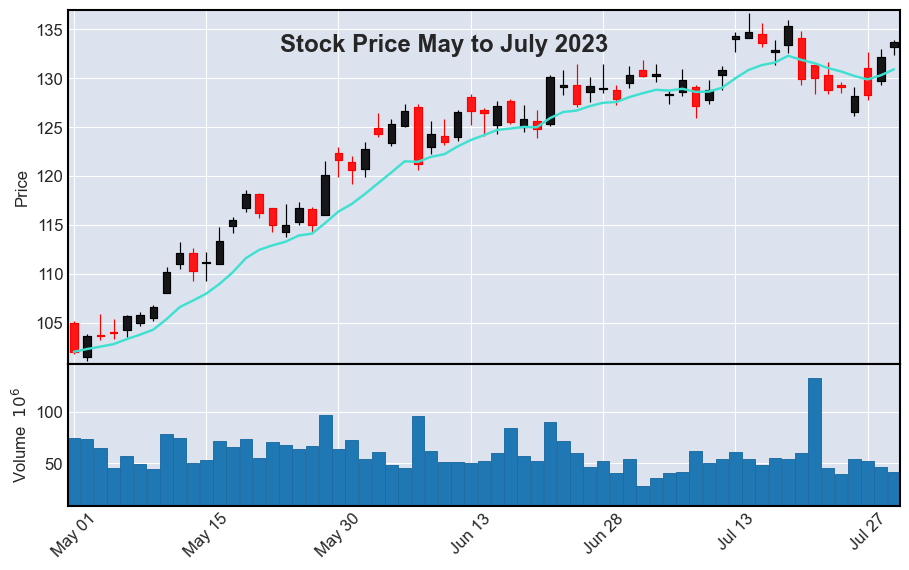

In [177]:
 mpf.plot(df['2023-05':'2023-07'],
 figratio=(10,6), type='candle',
 title= 'Stock Price May to July 2023',
 #mav=(10,15),
 ema=(10),
 volume = True,
 tight_layout = True, style ='kenan',
 )

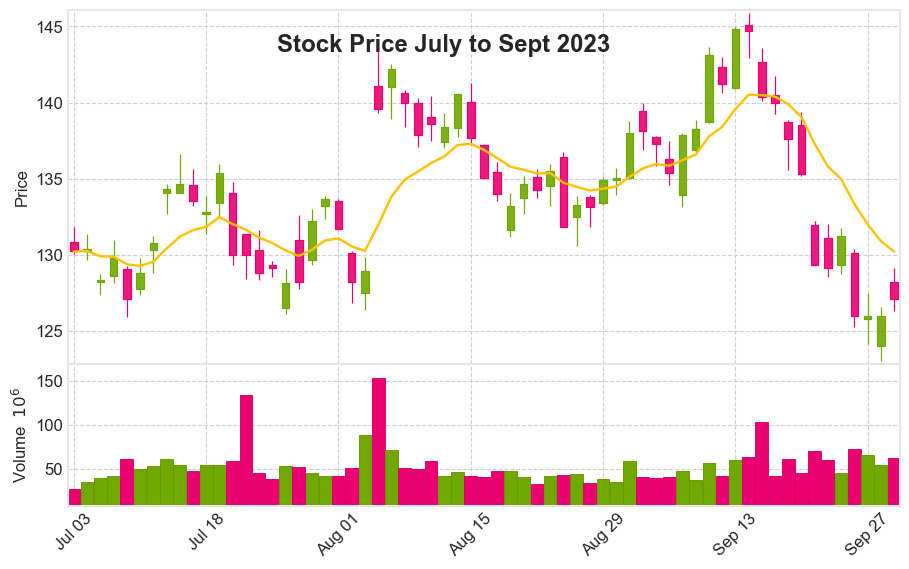

In [178]:
mpf.plot(df['2023-07':'2023-09'],
 figratio=(10,6), type='candle',
 title= 'Stock Price July to Sept 2023',
 ema=(10),
 volume = True,
 tight_layout = True, style ='binance',
 )

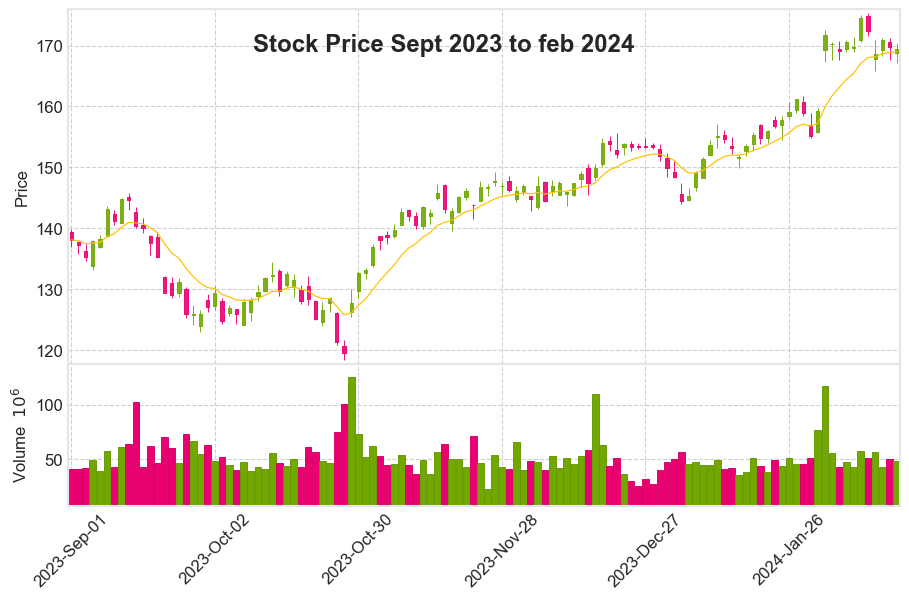

In [179]:
mpf.plot(df['2023-09':'2024-02'],
 figratio=(10,6), type='candle',
 title= 'Stock Price Sept 2023 to feb 2024',
 #mav=(10,15),
 ema=(10),
 volume = True,
 tight_layout = True, style ='binance',
 )

### Adding some Technical Indicator to the data
#### Relative Strength Index (RSI): Measures the speed and change of price movements, indicating
#### overbought or oversold conditions.
######                                            RSI = 100 −(100/1+(avg gain/avg loss))

#### Readings below 30 generally indicate that the stock is oversold, while readings above 70 indicate that it is
#### overbought.

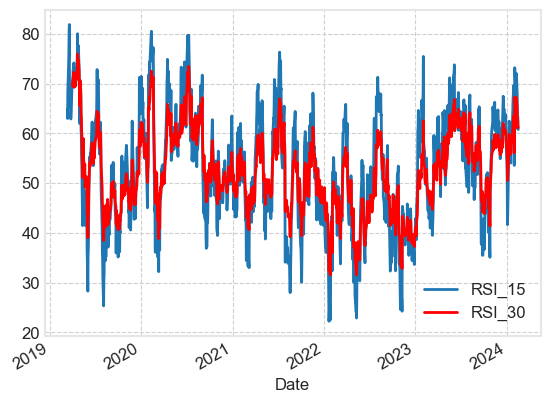

In [180]:
#calculates the RSI with a lookback period of 15.
RSI_15 =ta.rsi(df.Close, length=15)
RSI_30 =ta.rsi(df.Close, length=30)
RSI_15.plot()
RSI_30.plot(color ='red')
plt.legend()
plt.show()


In [181]:
df['RSI'] =ta.rsi(df.Close, length=15)

In [182]:
# mpf.plot(df['2023-09':'2023-10'], type='candle', style='yahoo',
#  title= 'Stock Price and RSI from Sept to Nov 2023',
#  addplot=[mpf.make_addplot(df['RSI']['2023-09':'2023-10'], panel=1, secondary_y=
#  mpf.make_addplot([70] * len(df['2023-09':'2023-10']), panel=1, seconda
#  mpf.make_addplot([30] * len(df['2023-09':'2023-10']), panel=1, seconda
#  )


In [183]:
#calculates the EMA with a smoothing period of 20.
df['EMAF']= ta.ema(df.Close, length=20)


##### EMAM (Exponential Moving Average - Medium): This calculates another EMA for the 'Close' prices, but
###### with a longer time period compared to EMAF. It's often referred to as a medium-term EMA

In [184]:
#  calculates the EMA with a smoothing period of 100.
df['EMAM']=ta.ema(df.Close, length=100)

##### EMAM (Exponential Moving Average - Medium): This calculates another EMA for the 'Close' prices, but
###### with a longer time period compared to EMAF. It's often referred to as a medium-term EMA

In [185]:
# calculates the EMA with a smoothing period of 150.
df['EMAS']=ta.ema(df.Close, length=200)

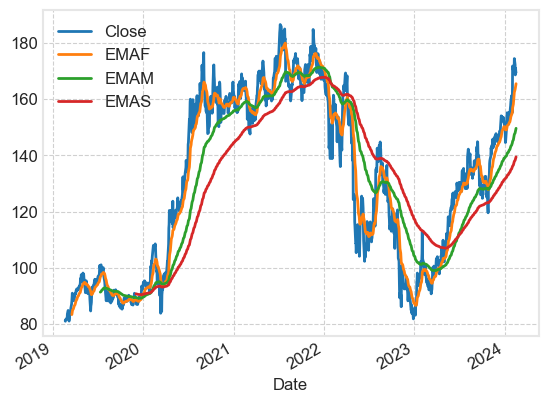

In [186]:
df['Close'].plot()
df['EMAF'].plot()
df['EMAM'].plot()
df['EMAS'].plot()
plt.legend()


#### Intraday Price Movement:
   The difference between the opening and adjusted closing prices provides insight into how much the price of
a financial instrument has moved within a single trading day. It gives you a sense of intraday volatility.

#### Market Sentiment:
   Positive values (df['Adj Close'] > df['Open']) suggest that the closing price was higher than the opening price, potentially indicating positive market sentiment or buying pressure during the day.Negative values (df['Adj Close'] < df['Open']) suggest that the closing price was lower than the opening price, potentially indicating negative market sentiment or selling pressure during the day.


In [187]:
df['Target'] = df['Adj Close']- df['Open']
df['Target'] = df['Target'].shift(-1)

#### Shifted Close Price:


In [188]:
df['TargetNextClose'] = df['Adj Close'].shift(-1)

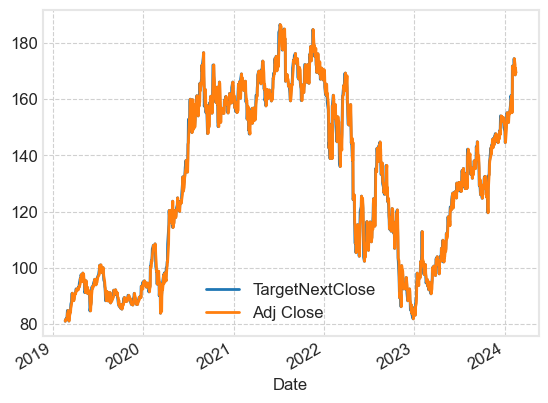

In [189]:
df['TargetNextClose'].plot()
df['Adj Close'].plot()
plt.legend()


<Axes: xlabel='Date'>

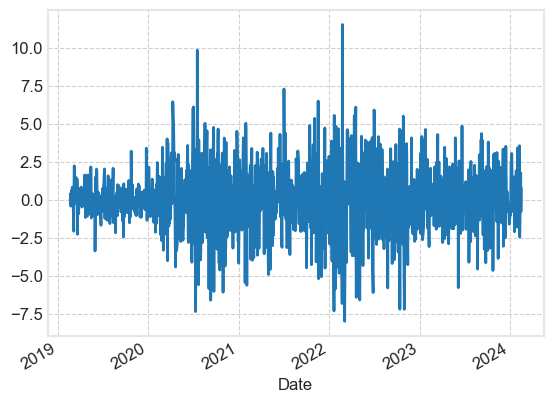

In [190]:
df['Target'].plot()


In [191]:
df['TargetClass'] = [1 if df.Target[i]>0 else 0 for i in range(len(df))]


###### Positive values (df['Adj Close'] > df['Open']) corresponds to TargetClass = 1
###### Negative values (df['Adj Close'] > df['Open']) corresponds to TargetClass = 0

<Axes: ylabel='TargetClass'>

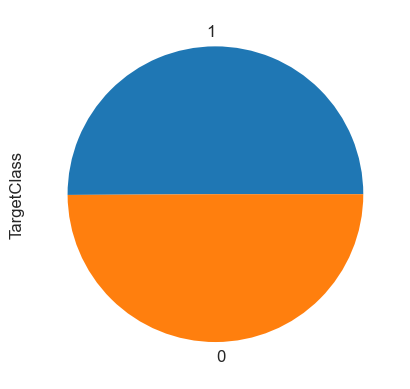

In [192]:
df['TargetClass'].value_counts().plot(kind='pie', )


In [193]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose,TargetClass
Date,,,,,,,,,,,,,
2024-02-12,174.800003,175.389999,171.539993,172.339996,172.339996,51050400,67.711141,163.424246,147.958513,138.232790,0.910004,168.639999,1
2024-02-13,167.729996,170.949997,165.750000,168.639999,168.639999,56345100,60.930942,163.920985,148.368047,138.535350,1.769989,170.979996,1
2024-02-14,169.210007,171.210007,168.279999,170.979996,170.979996,42815500,63.413397,164.593272,148.815809,138.858182,-0.779999,169.800003,0
2024-02-15,170.580002,171.169998,167.589996,169.800003,169.800003,49855200,61.308661,165.089151,149.231337,139.166061,0.769989,169.509995,1
2024-02-16,168.740005,170.419998,167.169998,169.509995,169.509995,48074600,60.777466,165.510184,149.632895,139.467991,NaN,NaN,0
